In [10]:
import os
from typing import List
import pandas as pd

def merge_csv_files(file_paths: List[str], output_file_path: str) -> None:
    """
    Function to merge multiple CSV files into one. 
    Keeps all columns and fills in missing values with 0.
    """
    # Initialize an empty list to hold dataframes
    df_list = []

    # Loop through the list of file paths
    for file_path in file_paths:
        # Load the CSV file into a pandas dataframe
        df = pd.read_csv(file_path)
        
        # Append the dataframe to the list
        df_list.append(df)

    # Concatenate all the dataframes in the list.
    # Use an outer join to keep all columns and fill in missing values with 0.
    merged_df = pd.concat(df_list, axis=0, ignore_index=True, sort=False).fillna(0)

    # Save the merged dataframe to a new CSV file
    merged_df.to_csv(output_file_path, index=False)

# Specify the paths to the CSV files to merge
csv_files = ["doppelbock/doppelbock_16S.csv", "sesotho/sesotho_16S.csv", "sour_beer/sour_beer_16S.csv", "cider/cider_16S.csv"]

# Specify the path to the output CSV file
output_file = "data/merged_bac.csv"

# Merge the CSV files
merge_csv_files(csv_files, output_file)

output_file

'data/merged_bac.csv'

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/merged_bac.csv')

df.head()

,index,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Pediococcus;s__Pediococcus_damnosus,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;__,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__Acetobacter;__,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus_buchneri,Unassigned;__;__;__;__;__;__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Erwiniaceae;g__Pantoea;__,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Acetobacterales;f__Acetobacteraceae;g__Acetobacter;s__Acetobacter_lovaniensis,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus_paracollinoides,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas_sp.,...,d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridia;f__Hungateiclostridiaceae;__;__,d__Bacteria;p__Campilobacterota;c__Desulfurellia;o__Desulfurellales;f__Desulfurellaceae;g__Desulfurella;__,d__Bacteria;__;__;__;__;__;__,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Eggerthellaceae;g__uncultured;s__uncultured_bacterium,d__Bacteria;p__Firmicutes;c__Bacilli;o__RF39;f__RF39;g__RF39;s__uncultured_bacterium,d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__uncultured_organism,d__Bacteria;p__Desulfobacterota;c__Desulfobulbia;o__Desulfobulbales;f__Desulfocapsaceae;__;__,d__Bacteria;p__Firmicutes;c__Clostridia;o__Caldicoprobacterales;f__Caldicoprobacteraceae;g__Caldicoprobacter;s__uncultured_bacterium,d__Bacteria;p__Gemmatimonadota;c__Gemmatimonadetes;o__Gemmatimonadales;f__Gemmatimonadaceae;g__Gemmatimonas;__,d__Archaea;p__Crenarchaeota;c__Thermoprotei;o__Desulfurococcales;f__Desulfurococcaceae;__;__
0,SRR14325452,36695.0,9758.0,1791.0,0.0,550.0,18.0,284.0,196.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR14325453,37656.0,14065.0,1341.0,51.0,684.0,0.0,0.0,0.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR14325454,17226.0,6810.0,1886.0,81.0,160.0,119.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR14325455,21981.0,0.0,326.0,3116.0,201.0,171.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR14325456,25418.0,0.0,9066.0,2615.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/merged_bac.csv')

bac_columns = []
bac_n_beer_columns = []

for col in df.columns:
    c = col.split(";")
    if len(c) != 7 and col != 'beer':
        print(col)
        continue
#     print(col)
    if ('g__' in col and c[0]=='d__Bacteria'):
        bac_columns.append(col)
    if ('g__' in col and c[0]=='d__Bacteria') or c[0]=='beer':
        bac_n_beer_columns.append(col)

        # s__ 11960 12144
bac_df = df.filter(bac_columns)
bac_df.to_csv('bac_df.csv')
print(bac_df.shape)


bac_n_beer_df = df.filter(bac_n_beer_columns)

# Get the list of columns in the DataFrame
columns_list = bac_n_beer_df.columns.tolist()

# Move the 'column_to_move' to the first position in the list
columns_list.insert(0, columns_list.pop(columns_list.index('beer')))

# Reorder the DataFrame with the updated columns list
bac_n_beer_df = bac_n_beer_df[columns_list]
bac_n_beer_df.to_csv('overview_beer_bac.csv', index=False)
print(bac_n_beer_df.shape)

num_beers = bac_n_beer_df['beer'].nunique()
print(num_beers)

index
sample_link
type
type_of_data
target
sequencing_technique
published_date
publication
publication_link
dataset_link_1
dataset_link_2
country
brewery
beer_id
(102, 667)
(102, 668)
14


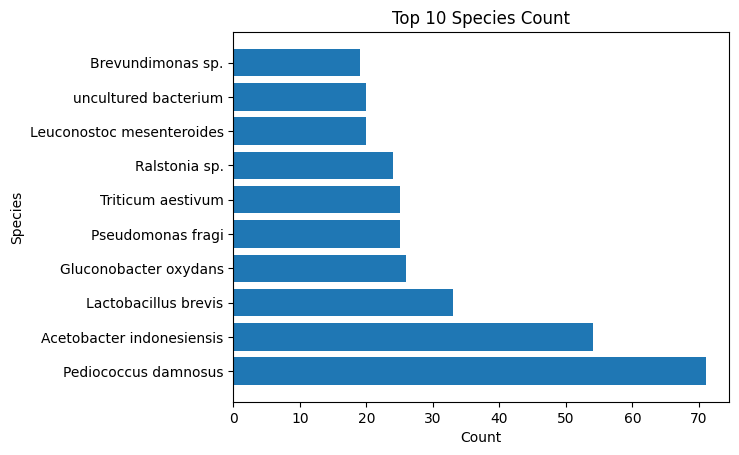

In [12]:
non_zero_cells = bac_df[bac_df != 0.0].count()

# Create a list of species names and counts
species_names = [label.split(';')[-1].strip()[3:].replace('_', ' ') for label in non_zero_cells.index.tolist()]
# for x in species_names:
#     print(x)
counts = non_zero_cells.tolist()

# Combine species names and counts into a DataFrame
species_counts_df = pd.DataFrame({'Species': species_names, 'Count': counts})

# Filter out the rows with 'Fungi sp' in the species names
# species_counts_df = species_counts_df[~species_counts_df['Species'].str.contains('Fungi sp', case=False)]

# Remove leading and trailing spaces from the 'Species' column
species_counts_df['Species'] = species_counts_df['Species'].str.strip()

# Filter out rows with empty 'Species' values
species_counts_df = species_counts_df[species_counts_df['Species'] != '']

# Sort the DataFrame by count in descending order
species_counts_df = species_counts_df.sort_values(by='Count', ascending=False)

# Select only the top 10 species
top_10_species = species_counts_df.head(10)

# Set up the plot
fig, ax = plt.subplots()
ax.barh(top_10_species['Species'], top_10_species['Count'])

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Species')
ax.set_title('Top 10 Species Count')

# Display the plot
plt.show()

beer
Stout Beer (9.64%)         282
Blond Beer (3.12%)         277
Sesotho                    166
Sour Flanders Red Ale      153
Blond Beer (8.88%)          78
American Wild Ale           61
Belgian Strong Dark Ale     55
Sour Ale                    27
Brett Beer                  19
Rubi Marzen Lager           19
Name: species, dtype: int64


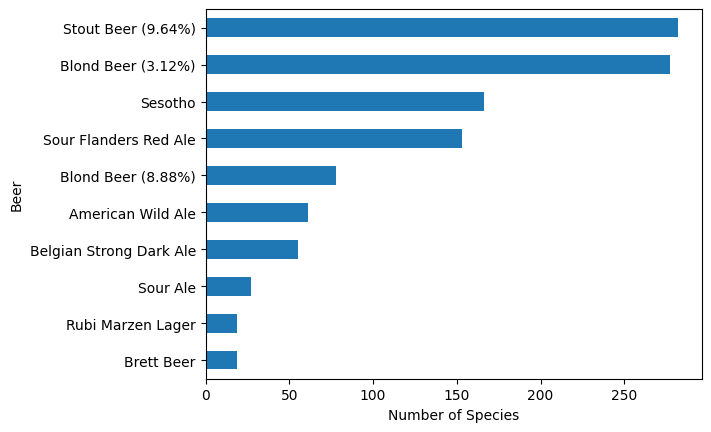

In [8]:
cur_df = bac_n_beer_df
# Melt the dataframe to have each row represent a unique beer-species pair
df_melted = cur_df.melt(id_vars='beer', var_name='species', value_name='count')

# Filter out species with a count of one or less
df_filtered = df_melted[df_melted['count'] > 0]

# Calculate the number of species for each beer
df_species_count = df_filtered.groupby('beer')['species'].nunique()

# Get the top 10 beers with the highest number of species
top_beers = df_species_count.nlargest(10)

# Display the top beers
print(top_beers)

# Plot the top 10 beers with the highest number of species
plt.figure()
top_beers.sort_values().plot(kind='barh')
plt.xlabel('Number of Species')
plt.ylabel('Beer')
plt.savefig('top10_beers_bac.png',dpi=300, bbox_inches = "tight")
plt.show()

Pediococcus damnosus         71
Acetobacter indonesiensis    54
Lactobacillus brevis         33
Sphingomonas sp.             28
Gluconobacter oxydans        26
Pseudomonas fragi            25
Triticum aestivum            25
Ralstonia sp.                24
Leuconostoc mesenteroides    20
Brevundimonas sp.            19
Name: species, dtype: int64


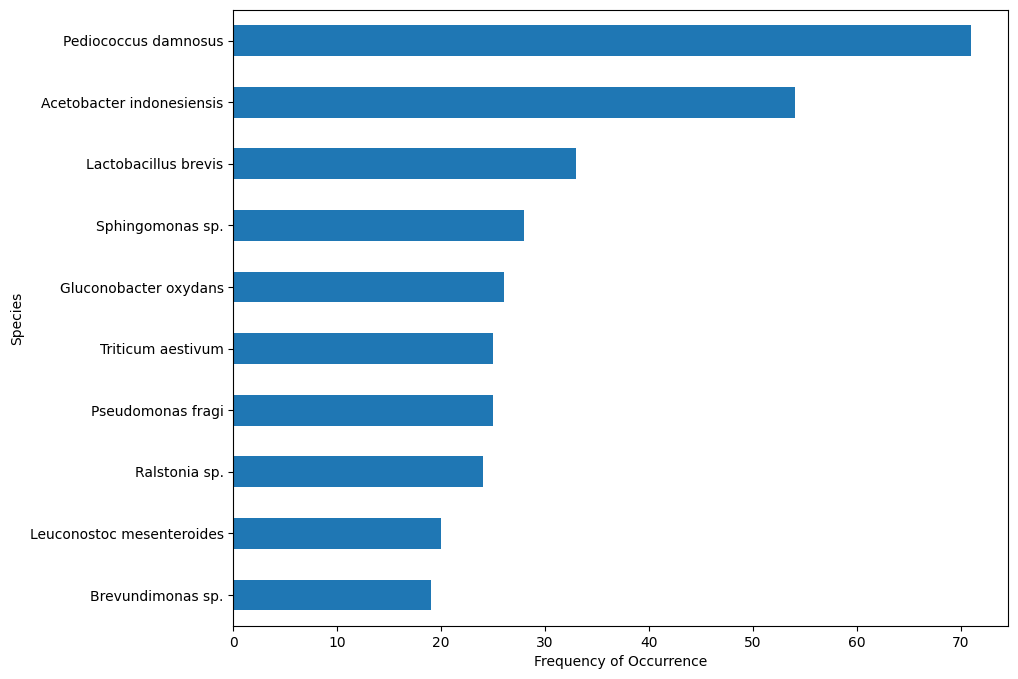

In [19]:
cur_df = bac_n_beer_df

# Process the column names
cur_df.columns = [label.split(';')[-1].strip()[3:].replace('_', ' ') if label != 'beer' else 'beer' for label in cur_df.columns.tolist()]

# Melt the dataframe to have each row represent a unique beer-species pair
df_melted = cur_df.melt(id_vars='beer', var_name='species', value_name='count')

# Remove leading and trailing spaces from the 'species' column
df_melted['species'] = df_melted['species'].str.strip()

# Filter out species with a count of one or less and exclude empty species
df_species_occurrence = df_melted[(df_melted['count'] > 1) & (df_melted['species'] != '')]

# Exclude the species 'fungi_sp'
df_species_occurrence = df_species_occurrence.loc[df_species_occurrence['species'] != 'uncultured bacterium']
df_species_occurrence = df_species_occurrence.loc[df_species_occurrence['species'] != 'uncultured organism']

# Calculate the frequency of occurrence for each species
species_frequency = df_species_occurrence['species'].value_counts()

# Get the top 10 species with the highest frequency of occurrence
top_species = species_frequency.nlargest(10)

# Display the top species
print(top_species)

# Plot the top 10 species with the highest frequency of occurrence
plt.figure(figsize=(10, 8))
top_species.sort_values().plot(kind='barh')
plt.xlabel('Frequency of Occurrence')
plt.ylabel('Species')
# plt.title('Top 10 Species with the Highest Frequency of Occurrence')
plt.savefig('top10_species_bac.png',dpi=300, bbox_inches = "tight")
plt.show()

Beers with overlap: []
Species with overlap: []


/tmp/ipykernel_74980/898401195.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['species'] = df_filtered['species'].apply(lambda x: x.split(';')[-1].strip()[3:].replace('_', ' '))
/tmp/ipykernel_74980/898401195.py:40: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = heatmap_data.pivot('species', 'beer', 'count')


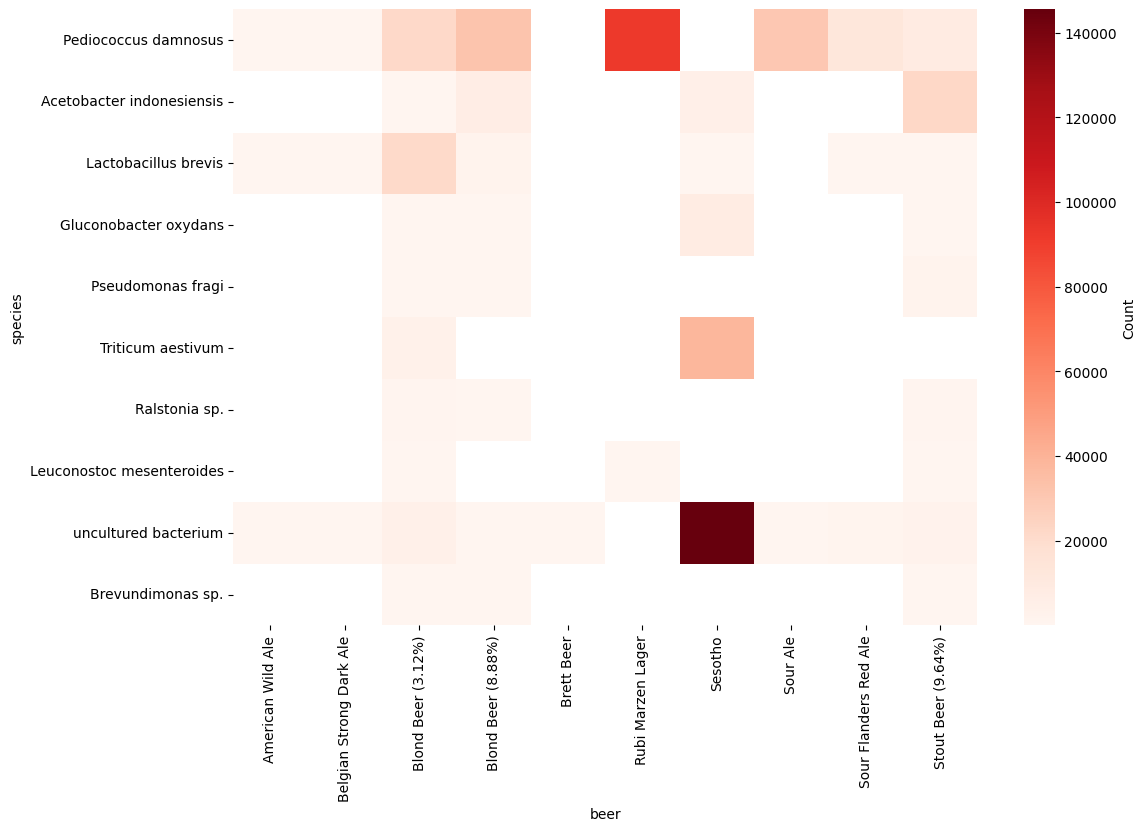

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the number of beers in which each species appears
species_frequency = (bac_n_beer_df.iloc[:, 1:] > 0).sum(axis=0)

# Adjust species names similarly as before
species_names_adjusted = [label.split(';')[-1].strip()[3:].replace('_', ' ') for label in species_frequency.index.tolist()]
species_frequency_df = pd.DataFrame({'Species': species_names_adjusted, 'Frequency': species_frequency.values})

# Remove leading and trailing spaces from the 'Species' column
species_frequency_df['Species'] = species_frequency_df['Species'].str.strip()

# Filter out rows with empty 'Species' values
species_frequency_df = species_frequency_df[species_frequency_df['Species'] != '']

# Sort by Frequency and get top 10
top_10_species_frequency = species_frequency_df.sort_values(by='Frequency', ascending=False).head(10)

# Processing the data to obtain top 10 beers with the most species
cur_df = bac_n_beer_df
df_melted = cur_df.melt(id_vars='beer', var_name='species', value_name='count')
df_filtered = df_melted[df_melted['count'] > 0]
df_species_count = df_filtered.groupby('beer')['species'].nunique()
top_beers = df_species_count.nlargest(10)

# Check if any beers from top_beers have entries in df_filtered with top 10 species
overlap_beers = df_filtered[df_filtered['beer'].isin(top_beers.index) & df_filtered['species'].isin(top_10_species_frequency['Species'])]['beer'].unique()
print("Beers with overlap:", overlap_beers)

# Check if any species from top_10_species have entries in df_filtered with top 10 beers
overlap_species = df_filtered[df_filtered['species'].isin(top_10_species_frequency['Species']) & df_filtered['beer'].isin(top_beers.index)]['species'].unique()
print("Species with overlap:", overlap_species)

# Heatmap for top 10 beers and top 10 species
df_filtered['species'] = df_filtered['species'].apply(lambda x: x.split(';')[-1].strip()[3:].replace('_', ' '))
heatmap_data = df_filtered[df_filtered['beer'].isin(top_beers.index) & df_filtered['species'].isin(top_10_species_frequency['Species'])]
heatmap_data = heatmap_data.groupby(['beer', 'species']).sum().reset_index()
heatmap_data = heatmap_data.pivot('species', 'beer', 'count')

# Step 1: Get the species in descending order based on their counts
ordered_species = top_10_species_frequency['Species'].tolist()

# Step 2: Reindex the heatmap_data DataFrame
heatmap_data = heatmap_data.reindex(ordered_species)

# Now, plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Reds", cbar_kws={'label': 'Count'})
plt.savefig('top_bac.png',dpi=300, bbox_inches = "tight")
plt.show()

beer
Sesotho                     70
Rubi Marzen Lager           51
Extra Doppelbock Lager      46
Sour Flanders Red Ale       24
American Wild Ale           23
Blond Beer (8.88%)          21
Sour Ale                    17
Chimay Red Cap              15
Waldbier 2014 Wienerwald    12
La Fourbe                    8
Name: species, dtype: int64


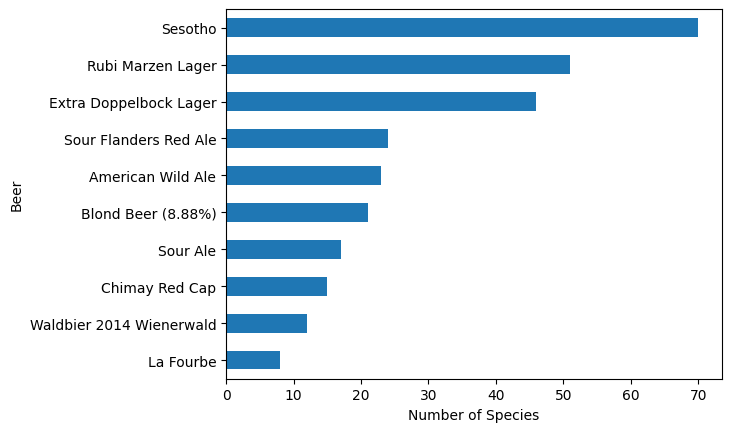

                            611
Saccharomyces cerevisiae    138
Wickerhamomyces anomalus     54
Dekkera bruxellensis         39
Pichia membranifaciens       39
Issatchenkia orientalis      34
Hanseniaspora uvarum         32
Candida tropicalis           26
Rhizopus arrhizus            25
Kluyveromyces marxianus      25
Name: species, dtype: int64


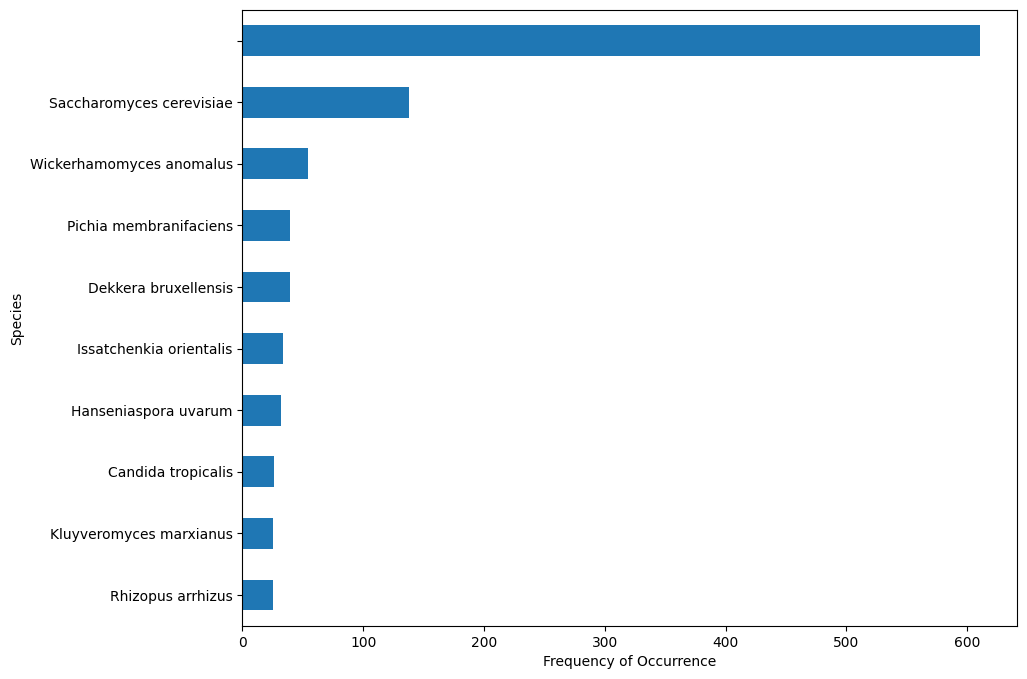

Sample looks Gaussian (fail to reject H0)
